# IRF - Uppsala Python Workshop: Snakes in Space 🐍
author: Louis Richard
e-mail: louisr@irfu.se
date: 29/02/2024

## CDF files with Python:
- Common Data Format (CDF) structure
- International Solar Terrestrial Physics (ISTP) compliance
- Reading/writing CDF files with Python

## Install PyCDFPP (PyCDF++) (see https://pycdfpp.readthedocs.io/en/stable/)

In [1]:
pip install pycdfpp

Note: you may need to restart the kernel to use updated packages.


## CDF file structure

### import package

In [2]:
import pycdfpp

### Read CDF file

In [3]:
cdf = pycdfpp.load(
    "/Volumes/mms/mms1/fgm/srvy/l2/2019/09/mms1_fgm_srvy_l2_20190914_v5.211.0.cdf"
)

In [4]:
cdf

CDF:
  version: 3.6.3
  majority: Adaptative column
  compression: None

Attributes:
  Project: "STP>Solar-Terrestrial Physics"
  Source_name: "MMS1>MMS Satellite Number 1"
  Discipline: "Space Physics>Magnetospheric Science"
  Data_type: "srvy_l2"
  Descriptor: "FGM>Flux Gate Magnetometer"
  File_naming_convention: "source_descriptor_datatype_yyyyMMdd"
  Data_version: "5.211.0"
  PI_name: "J. Burch, C. Russell, W. Magnus"
  PI_affiliation: "SWRI, UCLA, IWF"
  TEXT: [ [ "The Fluxgate Magnetometers (FGM) on Magnetospheric Multiscale consist of a traditional Analog Fluxgate Magnetometer (AFG), and a Digital Fluxgate magnetometer (DFG). The dual magnetometers are operated as a single instrument providing a single intercalibrated data product. Range changes occur at different times on the two instruments so the gains checked each periapsis can be carried out unambiguously to apoapsis. Cross correlation of calibration parameters can separate causes of the any apparent calibration changes. U

### Global attributes

In [5]:
cdf.attributes

Project: "STP>Solar-Terrestrial Physics"
Source_name: "MMS1>MMS Satellite Number 1"
Discipline: "Space Physics>Magnetospheric Science"
Data_type: "srvy_l2"
Descriptor: "FGM>Flux Gate Magnetometer"
File_naming_convention: "source_descriptor_datatype_yyyyMMdd"
Data_version: "5.211.0"
PI_name: "J. Burch, C. Russell, W. Magnus"
PI_affiliation: "SWRI, UCLA, IWF"
TEXT: [ [ "The Fluxgate Magnetometers (FGM) on Magnetospheric Multiscale consist of a traditional Analog Fluxgate Magnetometer (AFG), and a Digital Fluxgate magnetometer (DFG). The dual magnetometers are operated as a single instrument providing a single intercalibrated data product. Range changes occur at different times on the two instruments so the gains checked each periapsis can be carried out unambiguously to apoapsis. Cross correlation of calibration parameters can separate causes of the any apparent calibration changes. Use of Electron Drift Instrument (EDI) to determine the field along the rotation axis allows accurate moni

### Variables

In [6]:
zvariable = "mms1_fgm_b_gse_srvy_l2"
cdf[zvariable]

mms1_fgm_b_gse_srvy_l2:
  shape: [ 1244615, 4 ]
  type: CDF_REAL4
  record varry: True
  compression: GNU GZIP

  Attributes:
    CATDESC: "Magnetic field vector in Geocentric Solar Ecliptic (GSE) cartesian coordinates plus Btotal (8 or 16 S/s)"
    DEPEND_0: "Epoch"
    DISPLAY_TYPE: "time_series"
    FIELDNAM: "Magnetic field vector in GSE plus Btotal (8 or 16 S/s)"
    FILLVAL: [ [ [ -1e+31 ] ] ]
    FORMAT: "E13.5"
    LABL_PTR_1: "label_b_gse"
    UNITS: "nT"
    VALIDMIN: [ [ [ -17000, -17000, -17000, 0 ] ] ]
    VALIDMAX: [ [ [ 17000, 17000, 17000, 17000 ] ] ]
    VAR_TYPE: "data"
    SCALETYP: "linear"
    COORDINATE_SYSTEM: "GSE"
    SI_CONVERSION: "1.0e-9>T"
    TENSOR_ORDER: [ [ [ 1 ] ] ]
    REPRESENTATION_1: "represent_vec_tot"

### Variables attributes

In [7]:
cdf[zvariable].attributes

CATDESC: "Magnetic field vector in Geocentric Solar Ecliptic (GSE) cartesian coordinates plus Btotal (8 or 16 S/s)"
DEPEND_0: "Epoch"
DISPLAY_TYPE: "time_series"
FIELDNAM: "Magnetic field vector in GSE plus Btotal (8 or 16 S/s)"
FILLVAL: [ [ [ -1e+31 ] ] ]
FORMAT: "E13.5"
LABL_PTR_1: "label_b_gse"
UNITS: "nT"
VALIDMIN: [ [ [ -17000, -17000, -17000, 0 ] ] ]
VALIDMAX: [ [ [ 17000, 17000, 17000, 17000 ] ] ]
VAR_TYPE: "data"
SCALETYP: "linear"
COORDINATE_SYSTEM: "GSE"
SI_CONVERSION: "1.0e-9>T"
TENSOR_ORDER: [ [ [ 1 ] ] ]
REPRESENTATION_1: "represent_vec_tot"

In [8]:
type(cdf[zvariable].attributes)

pycdfpp._pycdfpp.AttributeMap

In [9]:
cdf[zvariable].attributes["TENSOR_ORDER"]

TENSOR_ORDER: [ [ [ 1 ] ] ]

In [10]:
type(cdf[zvariable].attributes["TENSOR_ORDER"])

pycdfpp._pycdfpp.Attribute

## PyCDFPP

### PyCDFPP supports file names and byte stream

In [11]:
import requests

In [12]:
themis_cdf_content = requests.get(
    "https://spdf.gsfc.nasa.gov/pub/data/themis/tha/l2/fgm/2016/tha_l2_fgm_20160101_v01.cdf"
).content

In [13]:
type(themis_cdf_content)

bytes

In [14]:
themis_cdf_content[:100]

b'\xcd\xf3\x00\x01\x00\x00\xff\xff\x00\x00\x00\x00\x00\x00\x018\x00\x00\x00\x01\x00\x00\x00\x00\x00\x00\x01@\x00\x00\x00\x03\x00\x00\x00\x08\x00\x00\x00\x01\x00\x00\x00\x03\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\nCommon Data Format (CDF)\nhttps://cd'

In [15]:
themis_cdf = pycdfpp.load(themis_cdf_content)
themis_cdf

CDF:
  version: 3.8.0
  majority: row
  compression: None

Attributes:
  Project: "THEMIS"
  Source_name: "THA>Themis Probe A"
  Discipline: "Space Physics>Magnetospheric Science"
  Data_type: "FGM"
  Descriptor: "L2>L2 DATA"
  Data_version: "1"
  PI_name: "V. Angelopoulos, U. Auster & K.H. Glassmeier and W. Baumjohann"
  PI_affiliation: "UCB, TUBS and IWF respectively, NASA NAS5-02099"
  TITLE: "Fluxgate Magnetometer Measurements"
  TEXT: "Sensor and electronics design provided by TUBS (Glassmeier, Auster) and IWF (Baumjohann, Magnes)"
  Instrument_type: "Magnetic Fields (space)"
  Mission_group: "THEMIS"
  Logical_source: "tha_l2_fgm"
  Logical_file_id: "tha_l2_fgm_20160101_v01"
  Logical_source_description: "Spacecraft-collected fluxgate magnetometer, Decimated TeleMetry High, DSL, GSE and GSM coordinates"
  Time_resolution: "1/4-1/128s"
  Rules_of_use: "Open Data for Scientific Use"
  Generated_by: "THEMIS SOC"
  Generation_date: "Tue Aug 22 10:49:28 2023"
  Acknowledgement: "NASA 

## PyCDFPP zVariables values are in numpy.ndarray

In [16]:
cdf[zvariable].values

array([[-1.52942822e+03, -1.55773682e+03,  7.16686182e+03,
         7.49196924e+03],
       [-1.53003918e+03, -1.55756970e+03,  7.16635791e+03,
         7.49157666e+03],
       [-1.53064270e+03, -1.55738599e+03,  7.16582275e+03,
         7.49115039e+03],
       ...,
       [ 1.48616123e+01, -7.14207983e+00, -4.19276178e-01,
         1.64940166e+01],
       [ 1.48605795e+01, -7.15654135e+00, -4.25224960e-01,
         1.64995060e+01],
       [ 1.48555517e+01, -7.14239359e+00, -4.20699000e-01,
         1.64887295e+01]], dtype=float32)

In [17]:
import numpy as np

In [18]:
np.linalg.norm(cdf[zvariable].values[:, :3], axis=1)

array([7491.969   , 7491.577   , 7491.1504  , ...,   16.494017,
         16.499508,   16.48873 ], dtype=float32)

### PyCDFPP Variables can be plotted

In [19]:
%matplotlib widget
import matplotlib.pyplot as plt

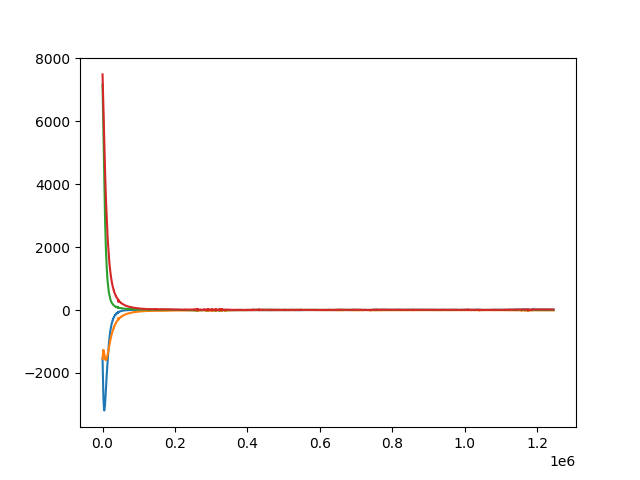

In [20]:
f, ax = plt.subplots(1)
ax.plot(cdf[zvariable])

### but time stays in EPOCH format

## Epoch format can be convert to datetime and numpy.datetime64 (faster) ~2ns/element

In [21]:
epoch_dt64 = pycdfpp.to_datetime64(cdf["Epoch"])

In [22]:
epoch_dt64

array(['2019-09-14T00:00:07.573877213', '2019-09-14T00:00:07.698878838',
       '2019-09-14T00:00:07.823880463', ...,
       '2019-09-15T00:00:01.015255246', '2019-09-15T00:00:01.077756064',
       '2019-09-15T00:00:01.140256882'], dtype='datetime64[ns]')

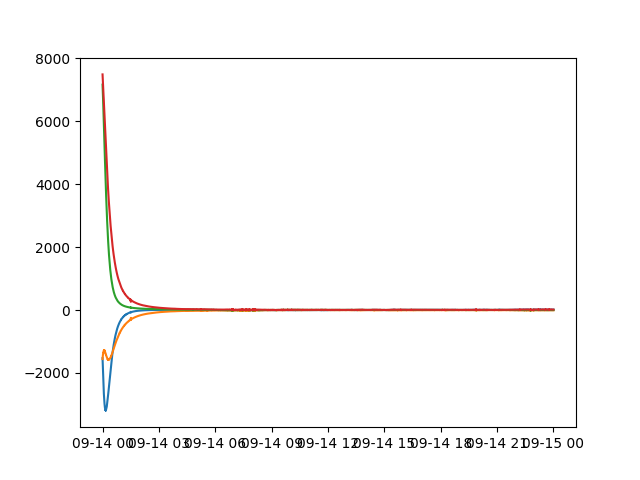

In [23]:
f, ax = plt.subplots(1)
ax.plot(epoch_dt64, cdf[zvariable])